### Question to awnser
<ol>
<li>[most frequently booked room nubmber](#freq_room)</li>
<li>[ratio of booking request type](#ratio)</li>
<li>[avarege hotel stay](#stay)</li>
<li>[most profitable services and which segement used them](#service)</li>
<li>[most profitable rooms types](#revennue)</li>
</ol>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

## Reading in and cleaning data


In [2]:
bookings = pd.read_table("D:/hotel analysis/bookings.txt",delimiter="|",parse_dates=[2,3])
bookings.head()

,id,room,start date,end date,request id
0,1,L0,2016-02-07,2016-02-10,1
1,2,L0,2016-03-13,2016-03-21,2
2,3,D2,2016-02-19,2016-02-20,3
3,4,X0,2016-01-22,2016-01-26,4
4,5,L0,2016-02-22,2016-02-26,5


In [3]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 5 columns):
id            10346 non-null int64
room          10346 non-null object
start date    10346 non-null datetime64[ns]
end date      10346 non-null datetime64[ns]
request id    10346 non-null int64
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 404.2+ KB


In [4]:
cols = [ i.replace(" ","_") for i in bookings.columns]
bookings.columns = cols

In [5]:
bookings.loc[bookings.start_date < datetime.date(2000,1,1),'start_date']

1918   1916-01-07
6455   1916-02-29
9515   1916-03-01
Name: start_date, dtype: datetime64[ns]

In [6]:
#fixing mellinium bug issue for certain entries eg: 2016 parsed as 1916
bookings.start_date = bookings.start_date.apply(lambda x: x.replace(year=2016) if x < datetime.datetime(2016,1,1) else x)
bookings.end_date = bookings.end_date.apply(lambda x: x.replace(year=2016) if x < datetime.datetime(2016,1,1) else x)

In [7]:
food_orders = pd.read_table("D:/hotel analysis/food_orders.txt",delimiter="|",parse_dates=[2,3])
cols = [ i.replace(" ","_") for i in food_orders.columns]
food_orders.columns = cols
food_orders.head()

,dest_room,bill_room,date,time,#orders,menu_id
0,L0,L0,2016-02-09,2016-09-27 10:15:00,3,6
1,restaurant,L0,2016-02-07,2016-09-27 11:35:00,5,8
2,L0,L0,2016-03-17,2016-09-27 06:54:00,5,12
3,restaurant,L0,2016-03-15,2016-09-27 17:53:00,4,7
4,L0,L0,2016-03-16,2016-09-27 14:54:00,5,7


In [8]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 6 columns):
dest_room    2965 non-null object
bill_room    2965 non-null object
date         2965 non-null datetime64[ns]
time         2965 non-null datetime64[ns]
#orders      2965 non-null int64
menu_id      2965 non-null int64
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 139.1+ KB


In [9]:
request = pd.read_table("D:/hotel analysis/request.txt",delimiter="|",parse_dates=[4,5])
cols = [ i.replace(" ","_") for i in request.columns]
request.columns = cols
request.head()

,request_id,client_name,room_type,request_type,start_date,end_date,#adults,#children
0,1,Dr. Iza Gerhold,conference_room_large,conference,2016-02-07,2016-02-10,27,0
1,2,Ila Sawayn,conference_room_large,conference,2016-03-13,2016-03-21,22,0
2,3,Iverson McCullough,double_room,business,2016-02-19,2016-02-20,2,1
3,4,Katharyn Goyette DVM,deluxe_room,business,2016-01-22,2016-01-26,1,0
4,5,Deloris Vandervort,conference_room_large,party,2016-02-22,2016-02-26,24,26


In [10]:
request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
request_id      5000 non-null int64
client_name     5000 non-null object
room_type       5000 non-null object
request_type    5000 non-null object
start_date      5000 non-null datetime64[ns]
end_date        5000 non-null datetime64[ns]
#adults         5000 non-null int64
#children       5000 non-null int64
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 312.6+ KB


In [11]:
print(request.room_type.value_counts())

normal_room              1024
conference_room_small    1015
deluxe_room              1005
double_room               998
conference_room_large     954
Double_room                 4
Name: room_type, dtype: int64


In [12]:
print(request.request_type.value_counts())

holiday       1544
business      1482
wedding        673
conference     651
party          645
vacation         5
Name: request_type, dtype: int64


In [13]:
#fixing typp errors for room type
request.loc[(request['room_type'] == "double_room") | (request['room_type'] == "Double_room"),'room_type'] = "double_room"

In [14]:
menu = pd.read_table("D:/hotel analysis/menu.txt",delimiter="|")
menu.head()

,id,name,price,category
0,0,water,2.5,drink
1,1,soft-drink,3.0,drink
2,2,beer,3.5,alcoholic-drink
3,3,wine,3.5,alcoholic-drink
4,4,simple-breakfast,5.0,breakfast


In [15]:
rooms = pd.read_table("D:/hotel analysis/rooms.txt",delimiter="|")
rooms.head()

,id,price/day,capacity,type,prefix
0,1,150,3,deluxe_room,X
1,2,100,3,double_room,D
2,3,80,15,conference_room_small,S
3,4,80,1,normal_room,N
4,5,150,50,conference_room_large,L


### Room type popularity
<a id='room_type'></a>

normal_room              0.2048
conference_room_small    0.2030
deluxe_room              0.2010
double_room              0.2004
conference_room_large    0.1908
Name: room_type, dtype: float64


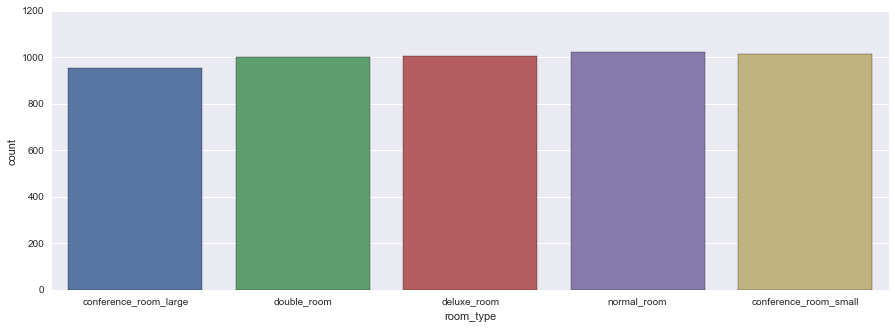

In [16]:
print(request.room_type.value_counts(normalize=True))
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot(x="room_type",data=request,ax=ax)


In [17]:
request.loc[(request['request_type'] == "holiday"),'request_type'] = "vacation"


### Ratio of request types
<a id="ratio"></a>


vacation      0.3098
business      0.2964
wedding       0.1346
conference    0.1302
party         0.1290
Name: request_type, dtype: float64


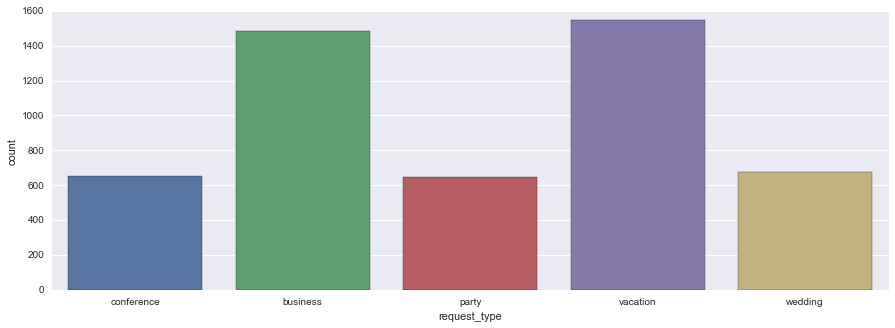

In [18]:
print(request.request_type.value_counts(normalize=True))
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot(x="request_type",data=request,ax=ax,)

vacation and business type booking requests are the most prominant and these would be the hotels key customer segement

In [19]:
#times the food was delivered outside the resturant
len(food_orders.loc[food_orders.dest_room != 'restaurant'])

1245

# indentifying unconfirmed requests
People can make a request for a room, but that does not mean this person is guaranteed to get the room. People can cancel their request, or not perhaps they don't show up.
A request is confirmed if there is an entry in the bookings data for it. 

In [20]:
booking_request = pd.merge(request,bookings,how="outer",on="request_id")
print(booking_request.isnull().sum())
booking_request.head()

request_id        0
client_name       0
room_type         0
request_type      0
start_date_x      0
end_date_x        0
#adults           0
#children         0
id              281
room            281
start_date_y    281
end_date_y      281
dtype: int64


,request_id,client_name,room_type,request_type,start_date_x,end_date_x,#adults,#children,id,room,start_date_y,end_date_y
0,1,Dr. Iza Gerhold,conference_room_large,conference,2016-02-07,2016-02-10,27,0,1.0,L0,2016-02-07,2016-02-10
1,2,Ila Sawayn,conference_room_large,conference,2016-03-13,2016-03-21,22,0,2.0,L0,2016-03-13,2016-03-21
2,3,Iverson McCullough,double_room,business,2016-02-19,2016-02-20,2,1,3.0,D2,2016-02-19,2016-02-20
3,4,Katharyn Goyette DVM,deluxe_room,business,2016-01-22,2016-01-26,1,0,4.0,X0,2016-01-22,2016-01-26
4,5,Deloris Vandervort,conference_room_large,party,2016-02-22,2016-02-26,24,26,5.0,L0,2016-02-22,2016-02-26


281 bookings id are missing from the merged table indicating that 281 request were not confirmed

In [21]:
confirmed_bookings = booking_request.loc[booking_request.id.notnull()]

In [22]:
#calculating and assigining the the duration of stay for confimed bookings
confirmed_bookings['duration_of_stay'] = confirmed_bookings.end_date_x-confirmed_bookings.start_date_x
confirmed_bookings['duration_of_stay'] = (confirmed_bookings['duration_of_stay'] / np.timedelta64(1,'D')).astype(int)

C:\Users\akheel\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\akheel\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Room Popularity top 5 rooms
<a id='freq_room'></a>

In [23]:
top_5_rooms=confirmed_bookings.room.value_counts().sort_values(ascending=False)[:5]
top_5_rooms

D2     36
S16    34
S17    33
X0     32
S15    32
Name: room, dtype: int64

In [24]:
room_popularity = pd.pivot_table(confirmed_bookings,index='room',columns="request_type",values=[''],aggfunc=len)
room_popularity.head()

request_type,business,conference,party,vacation,wedding
room,,,,,
D0,13.0,NaN,NaN,17.0,NaN
D1,8.0,NaN,NaN,15.0,NaN
D10,13.0,NaN,NaN,14.0,NaN
D11,12.0,NaN,NaN,12.0,NaN
D12,12.0,NaN,NaN,9.0,NaN


In [25]:
# top 5 rooms request type
for room,_ in top_5_rooms.iteritems():
    print(room)
    print(booking_request[booking_request.room==room]['request_type'].value_counts())
    print()

D2
business    19
vacation    17
Name: request_type, dtype: int64

S16
party         15
wedding       12
conference     7
Name: request_type, dtype: int64

S17
party         16
wedding       12
conference     5
Name: request_type, dtype: int64

X0
business    20
vacation    12
Name: request_type, dtype: int64

S15
wedding       16
party         11
conference     5
Name: request_type, dtype: int64



room D2 was booked the most for business and vaccation purposes followed by room s16

## Hotel stay duration
<a id="stay"></a>

In [26]:
#total days stayed by room type
confirmed_bookings.groupby('room_type')['duration_of_stay'].sum().sort_values(ascending=False)


room_type
normal_room              15191
conference_room_small    13058
double_room               6356
deluxe_room               6298
conference_room_large     5465
Name: duration_of_stay, dtype: int32

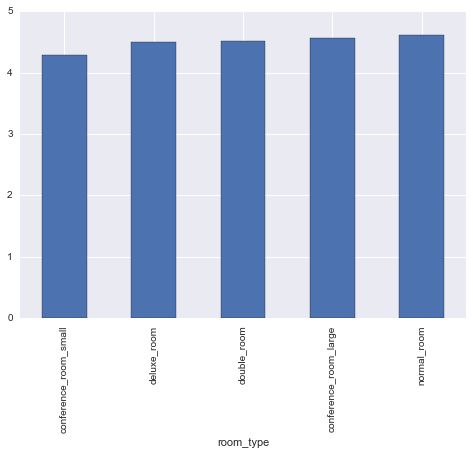

In [27]:
#Avg days stayed by room type
confirmed_bookings.groupby('room_type')['duration_of_stay'].mean().sort_values(ascending=True).plot(kind='Bar')

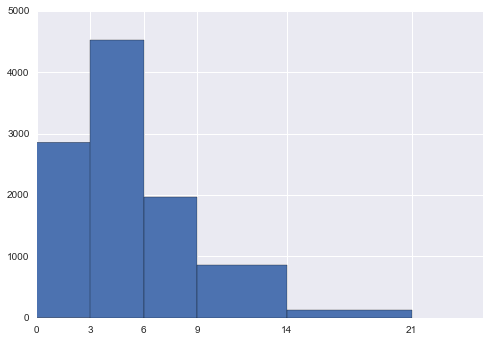

In [28]:
#histograme of duration stayed by periods
fig,ax = plt.subplots()
c,b,p = ax.hist(confirmed_bookings['duration_of_stay'],bins=[0,3,6,9,14,21])
plt.xticks(b)
plt.show()

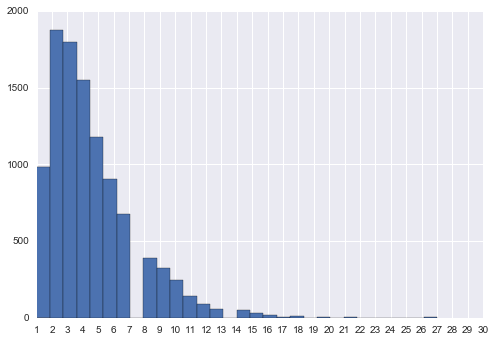

In [29]:
#histograme of duration stayed by indivijual day
fig,ax = plt.subplots()
c,b,p = ax.hist(confirmed_bookings['duration_of_stay'],bins=30)
ax.set_xticks([i for i in range(1,31)])
ax.set_xlim(1,30)
plt.show()

most guest stay between 2 to 4 days on average
all rooms have a median stay of 4 days and mean stay between 4-5 days
so average stays can be considered 4 days

## Analysis of Services provided

In [51]:
services = pd.read_table("D:/hotel analysis/services.txt",delimiter="|")
print(services.info())
cols = [ i.replace(" ","_") for i in services.columns]
services.columns = cols

def parse_date(date):
    if date == 'None':
        return
    return datetime.datetime.strptime(date,"%Y-%m-%d").date()

services.date = services.date.apply(parse_date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4374 entries, 0 to 4373
Data columns (total 4 columns):
booking id     4374 non-null object
price          4374 non-null int64
description    4374 non-null object
date           4374 non-null object
dtypes: int64(1), object(3)
memory usage: 136.8+ KB
None


In [52]:
services.description.value_counts()

decoration_flowers             1964
decoration_party                987
amusement_clown                 835
amusement_live_music            415
decoration_romantic_flowers     131
amusement_dj                     39
amusement_quartet                 1
decoration_party_flowers          1
decoration_wedding_flowers        1
Name: description, dtype: int64

In [53]:
#fixing typos in description column
services.loc[(services.description == "decoration_wedding_flowers") | \
             (services.description == "decoration_party_flowers"),'description']='decoration_flowers'
services.loc[(services.description == "amusement_quartet"),'description']='amusement_live_music'

In [54]:
services.description.value_counts()

decoration_flowers             1966
decoration_party                987
amusement_clown                 835
amusement_live_music            416
decoration_romantic_flowers     131
amusement_dj                     39
Name: description, dtype: int64

In [55]:
#changing the booking tables 'id' column name to 'bookings_id'
booking_request.columns = ['request_id', 'client_name', 'room_type', 'request_type',
       'start_date_x', 'end_date_x', '#adults', '#children', 'booking_id', 'room',
       'start_date_y', 'end_date_y']

In [56]:
def parse_int(x):
    try:
        return int(x)
    except ValueError:
        pass
services.booking_id = services.booking_id.apply(parse_int)

In [57]:
booking_services = pd.merge(services,bookings,how="left",left_on="booking_id",right_on="id")
booking_services_request = pd.merge(booking_services,request,how="left",on="request_id")

In [58]:
booking_services_request.request_type.value_counts()

vacation      1068
wedding       1028
party          939
business       755
conference     581
Name: request_type, dtype: int64

In [59]:
pd.pivot_table(booking_services_request,index='description',\
               columns="request_type",values=['price'],aggfunc={'price':np.sum},fill_value=0,margins=True)

price                                        \
request_type                business conference    party vacation  wedding   
description                                                                  
amusement_clown                  0.0    17700.0  30900.0      0.0  34900.0   
amusement_dj                     0.0      630.0   1080.0      0.0   1800.0   
amusement_live_music             0.0     9700.0  14800.0      0.0  17000.0   
decoration_flowers            4840.0     1850.0   3070.0   6820.0   3060.0   
decoration_party              4820.0     2140.0   2660.0   6860.0   3260.0   
decoration_romantic_flowers    450.0      120.0    450.0    645.0    300.0   
All                          10110.0    32140.0  52960.0  14325.0  60320.0   

                                       
request_type                      All  
description                            
amusement_clown               83500.0  
amusement_dj                   3510.0  
amusement_live_music          41500.0  
decoration_flowers            19640.0  
decoration_party              19740.0  
decoration_romantic_flowers    1965.0  
All                          169855.0

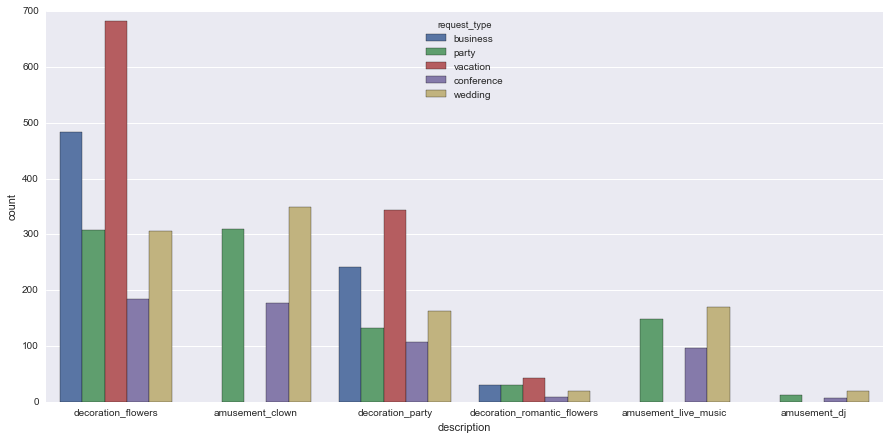

In [60]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(x="description",hue='request_type',data=booking_services_request,ax=ax)

<a id="service"></a>
decoration flowers is the most requested service but only contributes to 11% of total revenue from services
amusement_clown generates the highest revenue 49% of all service revenue but it is the 2nd requested service
where as live music contributes only 24.4% to total revenue while in is the 3rd most requested service


business request mainly request decoration services while conferences and weddings can take up the full range of services

## room with highest revenue


In [61]:
cb = confirmed_bookings.drop(['request_id', 'client_name', 'start_date_x', 'end_date_x', '#adults', '#children','start_date_y', 'end_date_y'],axis=1)
cb.id = cb.id.astype(int)
cb.head()

,room_type,request_type,id,room,duration_of_stay
0,conference_room_large,conference,1,L0,3
1,conference_room_large,conference,2,L0,8
2,double_room,business,3,D2,1
3,deluxe_room,business,4,X0,4
4,conference_room_large,party,5,L0,4


In [62]:
rooms = rooms[['id','price/day','type']]
room_revenue = pd.merge(cb,rooms,how="inner",left_on="room_type",right_on="type")
room_revenue.drop(["id_y","type"],axis=1,inplace=True)
total_room_revenue = room_revenue.groupby('room')['price/day'].sum()

In [63]:
room_type_menu_item = pd.merge(food_orders,menu,left_on="menu_id",right_on="id")
room_type_menu_item.head()

,dest_room,bill_room,date,time,#orders,menu_id,id,name,price,category
0,L0,L0,2016-02-09,2016-09-27 10:15:00,3,6,6,deluxe-breakfast,12.0,breakfast
1,restaurant,L0,2016-03-05,2016-09-27 10:10:00,3,6,6,deluxe-breakfast,12.0,breakfast
2,S2,S2,2016-01-14,2016-09-27 02:43:00,5,6,6,deluxe-breakfast,12.0,breakfast
3,restaurant,D3,2016-03-06,2016-09-27 23:06:00,5,6,6,deluxe-breakfast,12.0,breakfast
4,restaurant,L1,2016-04-01,2016-09-27 01:24:00,2,6,6,deluxe-breakfast,12.0,breakfast


In [64]:
total_menu_revenue = room_type_menu_item.groupby('bill_room')['price'].sum()

In [65]:
services = services[services.booking_id.notnull()]
services.booking_id = services.booking_id.astype(int)
temp_booking = bookings[['id','room']]
services_revenue = pd.merge(services,temp_booking,how="inner",left_on="booking_id",right_on="id")
services_revenue.head()

,booking_id,price,description,date,id,room
0,3,10,decoration_flowers,2016-02-19,3,D2
1,5,100,amusement_clown,2016-02-25,5,L0
2,6,10,decoration_flowers,2016-03-22,6,N0
3,8,20,decoration_party,2016-03-24,8,N2
4,17,20,decoration_party,2016-02-03,17,D0


In [66]:
services_revenue = services_revenue[['price',"room"]]
total_service_revenue = services_revenue.groupby('room')['price'].sum()
total_revenue = pd.DataFrame()
total_revenue["room"] = total_room_revenue
total_revenue["menu"] = total_menu_revenue
total_revenue['service'] = total_service_revenue
total_revenue['sum'] = total_revenue["room"] + total_revenue["menu"] + total_revenue['service']

In [67]:
def classify_rooms(x):
    if x[0] == 'L':
        return "conference_room_large"
    if x[0] == 'X':
        return "deluxe_room"
    if x[0] == 'D':
        return "double_room"
    if x[0] == 'S':
        return "conference_room_small"
    if x[0] == 'N':
        return "normal_room"

In [68]:
total_revenue.columns = ['room_revenue', 'menu_revenue', 'service_revenue', 'sum']
total_revenue = total_revenue.reset_index()

In [69]:
total_revenue['room_type'] = total_revenue.room.apply(classify_rooms)

In [70]:
total_revenue.groupby('room_type').sum()

,room_revenue,menu_revenue,service_revenue,sum
room_type,,,,
conference_room_large,179400,14045.5,42055.0,234813.5
conference_room_small,244000,10165.5,103365.0,351332.0
deluxe_room,210000,490.0,5645.0,87382.5
double_room,140700,374.0,5815.0,67273.5
normal_room,263440,994.5,12975.0,135202.5


normal rooms generate the highest revenue from guest rooms and small conference rooms generate 50% more revennue than large conference rooms
<a id="revennue"></a>